# Week 8 — Track 2: Conversational Data Visualization with LLM Guidance
Natural language → data query/transform → matplotlib chart (no seaborn).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print('Pandas/Matplotlib imported.')

Pandas/Matplotlib imported.


## 1) Load a sample dataset (replace with your project CSV)

In [4]:
df = pd.read_csv("medical_summary_agent_metrics.csv")
print("✅ Dataset loaded successfully!")
display(df)

✅ Dataset loaded successfully!


,case_id,disease_type,input_length,summary_length,rouge_l,evidence_coverage,redundancy_rate,trust_score,latency_ms,agent_version,summary_date
0,1,Kidney Failure,690,231,0.83,0.74,0.09,0.75,563,v1.4,2024-10-11
1,2,Asthma,790,254,0.89,0.78,0.08,0.81,527,v1.2,2024-10-12
2,3,Anemia,730,242,0.87,0.77,0.11,0.78,472,v1.1,2024-10-13
3,4,Flu,722,228,0.89,0.77,0.07,0.81,569,v1.3,2024-10-14
4,5,Kidney Failure,451,147,0.81,0.74,0.07,0.75,579,v1.0,2024-10-15
5,6,Arthritis,468,146,0.88,0.78,0.09,0.80,535,v1.4,2024-10-16
6,7,Heart Disease,423,138,0.88,0.79,0.06,0.81,463,v1.0,2024-10-17
7,8,Hypertension,438,118,0.80,0.86,0.09,0.80,625,v1.4,2024-10-18
8,9,Asthma,465,120,0.87,0.81,0.10,0.81,628,v1.4,2024-10-19
9,10,Anemia,719,211,0.87,0.82,0.05,0.83,471,v1.1,2024-10-20


## 2) NL → plot spec (template)

In [5]:
def nl_to_plot_spec(nl: str):
    nl = nl.lower()
    if 'metric a' in nl and 'year' in nl:
        return {'x':'year','y':'metric_a','kind':'line','title':'Metric A over Year'}
    if 'metric b' in nl and 'year' in nl:
        return {'x':'year','y':'metric_b','kind':'line','title':'Metric B over Year'}
    return {'x':'year','y':'metric_a','kind':'line','title':'Metric A over Year (default)'}
print(nl_to_plot_spec('plot metric a by year'))

{'x': 'year', 'y': 'metric_a', 'kind': 'line', 'title': 'Metric A over Year'}


In [6]:
def parse_query(query, df_columns):
    q = query.lower()
    x, y = None, None

    # Common x-axis hints
    for axis_candidate in ["summary_date", "agent_version", "disease_type", "case_id"]:
        if axis_candidate in q and axis_candidate in df_columns:
            x = axis_candidate
            break

    # Possible y-axis metrics
    for col in df_columns:
        if col in q and col != x:
            y = col
            break

    return {"x": x, "y": y}


In [7]:
import matplotlib.pyplot as plt

def generate_plot(query, df):
    spec = parse_query(query, df.columns)
    x, y = spec["x"], spec["y"]

    if not x or not y:
        print(f"⚠️ Could not infer x/y for: '{query}'")
        return

    if x not in df.columns or y not in df.columns:
        print(f"⚠️ Invalid columns detected for '{query}'")
        return

    plt.figure(figsize=(8,5))
    plt.plot(df[x], df[y])
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.title(f"{y.title()} vs {x.title()}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    print(f"✅ Query: '{query}' → x='{x}', y='{y}'")


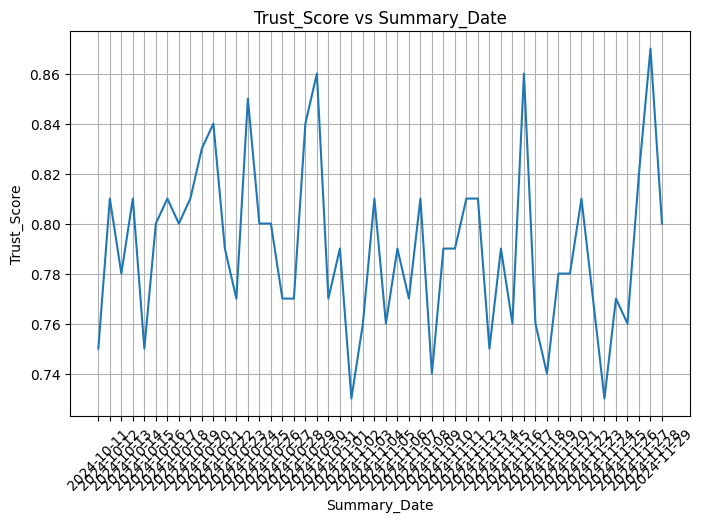

✅ Query: 'plot trust_score by summary_date' → x='summary_date', y='trust_score'


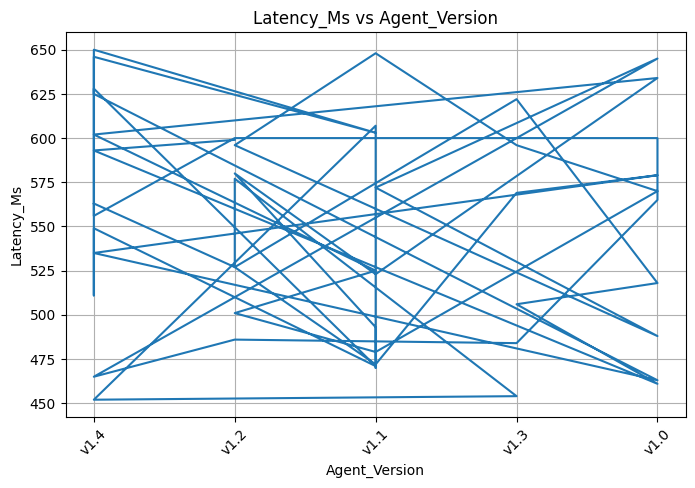

✅ Query: 'show latency_ms trend by agent_version' → x='agent_version', y='latency_ms'


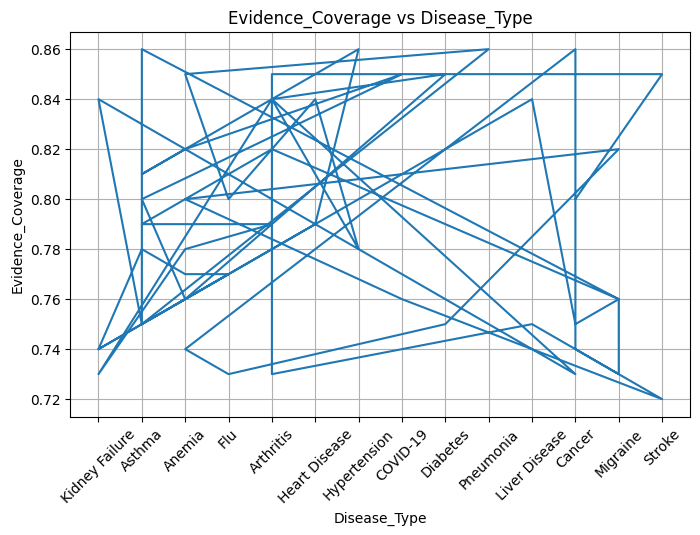

✅ Query: 'compare evidence_coverage by disease_type' → x='disease_type', y='evidence_coverage'


In [8]:
queries = [
    "plot trust_score by summary_date",
    "show latency_ms trend by agent_version",
    "compare evidence_coverage by disease_type"
]

for q in queries:
    generate_plot(q, df)
